In [20]:
!pip install CoolProp

In [21]:
from CoolProp.CoolProp import PropsSI

Refrigerant-134a enters the compressor of a refrigerator as superheated vapor at $p_1$ and $T_1$ at a rate of $\dot{m}$ and leaves at $P_2$ and $T_2$. The refrigerant is cooled in the condenser to $T_3$ and $p_3$ and is throttled to $p_4$. We can treat the throttling process as isenthalpic, $h_3 = h_4$. Disregard any heat transfer and pressure drops in the connecting lines between the components. Please analyze the throttling process from state 3 to 4.

Determine:
- (a) the change in temperature from state 3 to state 4, $T_3 - T_4$. 
- (b) the change in specific volume from state 3 to state 4, $v_4 - v_3$.
- (c) the change in pressure from state 3 to state 4, $p_3 - p_4$.
- (d) the change in internal energy from state 3 to state 4, $u_3 - u_4$.

In [22]:
p1_MPa = 0.14
T1_C = -10
mdot_kgPerS = 0.05
p2_MPa = 0.8
T2_C = 50
p3_MPa = 0.72
T3_C = 26
p4_MPa = 0.15

fluid = 'R134a'


P1 = p1_MPa*1e6
T1 = T1_C + 273.15
P2 = p2_MPa*1e6
T2 = T2_C +273.15
P3 = p3_MPa*1e6
T3 = T3_C + 273.15
P4 = p4_MPa*1e6

In [23]:
h1 = PropsSI('H','P',P1,'T',T1,fluid)
s1 = PropsSI('S','P',P1,'T',T1,fluid)

h2 = PropsSI('H','P',P2,'T',T2,fluid)
s2 = PropsSI('S','P',P2,'T',T2,fluid)

u3 = PropsSI('U','P',P3,'T',T3,fluid)
h3 = PropsSI('H','P',P3,'T',T3,fluid)
s3 = PropsSI('S','P',P3,'T',T3,fluid)
v3 = PropsSI('V','P',P3,'T',T3,fluid)

h4 = h3
u4 = PropsSI('U','P',P4,'H',h4,fluid)
s4 = PropsSI('S','P',P4,'H',h4,fluid)
T4 = PropsSI('T','P',P4,'H',h4,fluid)
Q4 = PropsSI('Q','P',P4,'H',h4,fluid)
v4 = PropsSI('V','P',P4,'H',h4,fluid)

s41 = PropsSI('S','P',P4,'Q',1,fluid)

We can now calculate the answers to (a)-(d):

In [52]:
print('(a): T3 - T4: {0:1.4f} K'.format(T3-T4))
print('(b): v3-v4: {0:1.4f} m3/kg'.format(v3-v4))
print('(c): p3-p4: {0:1.4f} Pa'.format(P3-P4))
print('(d): u3-u4: {0:1.4f} J/kg'.format(u3-u4))

(a): T3 - T4: 43.1323 K
(b): v3-v4: 0.0002 m3/kg
(c): p3-p4: 570000.0000 Pa
(d): u3-u4: 4953.3066 J/kg


In [25]:
import CoolProp
from CoolProp.Plots import PropertyPlot

import numpy as np
import matplotlib.pyplot as plt

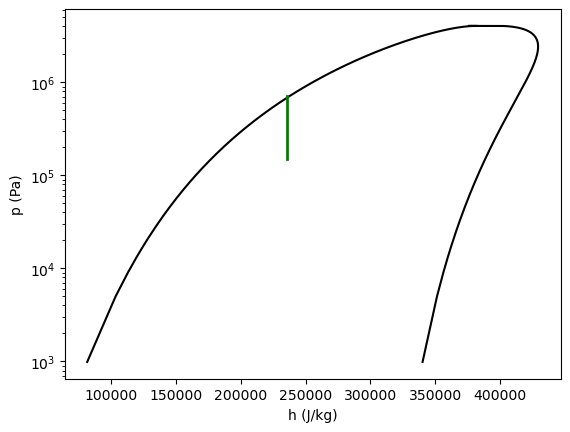

In [50]:
# plotting

T_critical_K = 374.21
T_triple_K = 169.85

P_critical_Pa = 4059280.0
P_triple_Pa = 389.5637885619895

plt.figure()
plt.clf()
    
# saturated vapor and liquid lines
Psat = np.linspace(P_triple_Pa+600, P_critical_Pa-30000, 1000) # 

hvap = [PropsSI('H','P',p,'Q',1,fluid) for p in Psat]
hliq = [PropsSI('H','P',p,'Q',0,fluid) for p in Psat]

plt.semilogy(hvap, Psat, 'k-')
plt.semilogy(hliq, Psat, 'k-')

plt.semilogy([h3, h4], [P3, P4], 'g-', lw=2) # Throttling process

plt.xlabel('h (J/kg)')
plt.ylabel('p (Pa)')
plt.savefig('r134a-throttling.png')
plt.savefig('r134a-throttling.eps', format='eps')